# Evaluating simple linear regressions on lemonade data with other features:

1. Create a dataframe from the csv at https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv

In [1]:
# python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# creates model object
from statsmodels.formula.api import ols

# evaluation metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")
df.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


(array([ 3., 23., 27., 49., 52., 90., 71., 27., 13., 10.]),
 array([ 7. , 10.6, 14.2, 17.8, 21.4, 25. , 28.6, 32.2, 35.8, 39.4, 43. ]),
 <a list of 10 Patch objects>)

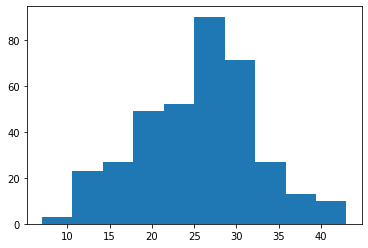

In [3]:
plt.hist(df.sales)

Text(0.5, 1.0, 'Distribution of Flyers')

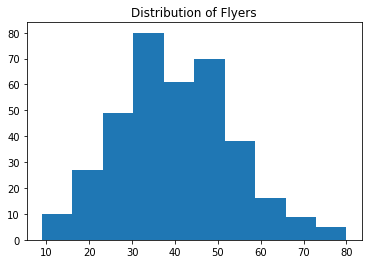

In [4]:
# Taking a look at flyers
plt.hist(df.flyers)
plt.title('Distribution of Flyers')

2. Make a baseline for predicting sales. (The mean is a good baseline)

In [5]:
# First - establish a baseline. 
# Sales are reasonably normally distributed, we can use the mean
baseline = df.sales.mean()

3. Create a new dataframe to hold residuals.

- Our x is the independent feature, y is what we want to predict
- yhat is what our model predicts

In [6]:
residuals = pd.DataFrame()
residuals['x'] = df.temperature
residuals['y'] = df.sales
residuals['baseline'] = baseline
residuals.head(5)

,x,y,baseline
0,27.0,10,25.323288
1,28.9,13,25.323288
2,34.5,15,25.323288
3,44.1,17,25.323288
4,42.4,18,25.323288


4. Calculate the baseline residuals.

In [7]:
residuals['baseline_residual'] = residuals.baseline - residuals.y
residuals.head()

,x,y,baseline,baseline_residual
0,27.0,10,25.323288,15.323288
1,28.9,13,25.323288,12.323288
2,34.5,15,25.323288,10.323288
3,44.1,17,25.323288,8.323288
4,42.4,18,25.323288,7.323288


5. Use ols from statsmodels to create a simple linear regression (1 independent variable, 1 dependent variable) to predict sales using flyers.

        - the df variable is lemonade data
        - model = ols('sales ~ flyers', data=df).fit()
        - predictions = model.predict(df.x)

In [8]:
# Going to try with temp instead of sales
# The arguments to the ols function are the column names as strings, separated by ~
# ols("y ~ x") 
model = ols('sales ~ flyers', df).fit()

1. Use the .predict method from ols to produce all of our predictions. Add these predictions to the data

In [9]:
# creates prediction based on x
residuals['y_hat'] = model.predict()

2. Calculate that model's residuals.

In [10]:
# calculates residual of model
residuals['model_residual'] = residuals.y_hat - residuals.y

residuals.head()

,x,y,baseline,baseline_residual,y_hat,model_residual
0,27.0,10,25.323288,15.323288,14.673754,4.673754
1,28.9,13,25.323288,12.323288,14.673754,1.673754
2,34.5,15,25.323288,10.323288,19.727926,4.727926
3,44.1,17,25.323288,8.323288,20.149107,3.149107
4,42.4,18,25.323288,7.323288,22.255013,4.255013


3. Evaluate that model's performance and answer if the model is significant.

In [11]:
def sum_squared_errors(df):
    
    # calculates sum of squared errors for baseline and model
    baseline_sse = ((df.baseline_residual)**2).sum()
    model_sse = ((df.model_residual)**2).sum()
    
    #print statement for whichever one is more accurate
    if baseline_sse > model_sse:
        print("Our model beats the baseline! We can continue to evaluate.")
    else:
        print("Dag-nabbit! The baseline beat our model!")
        
    # returns the value
    return baseline_sse, model_sse

baseline_sse, model_sse = sum_squared_errors(residuals)

Our model beats the baseline! We can continue to evaluate.


4. Evaluate that model's performance and answer if the feature is significant.

In [12]:
print('SSE - The models sum of squared errors is:', round(model_sse, 3))
print('MSE - The mean of squared errors is:', round(model_sse/len(df.sales), 3))
print('RMSE - The square root of the mean of squared errors is:', round(sqrt(model_sse/len(df.sales)), 3))

SSE - The models sum of squared errors is: 6083.326
MSE - The mean of squared errors is: 16.667
RMSE - The square root of the mean of squared errors is: 4.082


$R^2$ tells you how well your model fits the data by measuring the strength of the relationship between your model and the dependent variable. However, it is not a formal test for the relationship. The F-test of overall significance is the hypothesis test for this relationship. It indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables.

If the overall F-test is significant (evident through the p-value of the F statistic), you can conclude that $R^2$ does not equal zero, and the correlation between the model and dependent variable is statistically significant.

In [13]:
# calculate r squared first
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.648


In [14]:
# if p is low, we reject the null (aka reject that the feature is not significant)
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  2.193718738113383e-84


In [15]:
# creating a DF to hold these values for each model
models = pd.DataFrame(columns=['Model_1','Model_2','Model_3','Model_4'], index=['SSE','MSE','RMSE'])
models['Model_1'] = [round(model_sse, 3), round(model_sse/len(df.sales), 3), round(sqrt(model_sse/len(df.sales)), 3)]
models.head()

,Model_1,Model_2,Model_3,Model_4
SSE,6083.326,NaN,NaN,NaN
MSE,16.667,NaN,NaN,NaN
RMSE,4.082,NaN,NaN,NaN


# Repetition Improves Performance!
- In the next section of your notebook, perform the steps above with the rainfall column as the model's feature. Does this model beat the baseline? Would you prefer the rainfall model over the flyers model?

Text(0.5, 1.0, 'Distribution of Rainfall')

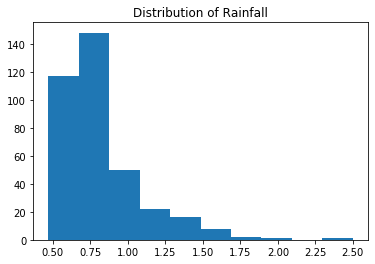

In [16]:
# taking a look at the feature used to predict
plt.hist(df.rainfall)
plt.title('Distribution of Rainfall')

In [17]:
# First - establish a baseline. 
# Sales is normally distributed, so the average
baseline = df.sales.mean()

# crating empty df to hold actual, predicted, residuals
rain_residuals = pd.DataFrame()

# adding x and y
rain_residuals['x'] = df.rainfall
rain_residuals['y'] = df.sales

# adding baseline prediction of mode .77
rain_residuals['baseline'] = baseline

# calculating baseline residuals
rain_residuals['baseline_residual'] = rain_residuals.baseline - rain_residuals.y

# creating model for rainfall predicting sales
model = ols('sales ~ rainfall', df).fit()

# creates prediction (sales) based on x (rainfall)
rain_residuals['y_hat'] = model.predict()

# calculates residual of model
rain_residuals['model_residual'] = rain_residuals.y_hat - rain_residuals.y


rain_residuals.head(5)

,x,y,baseline,baseline_residual,y_hat,model_residual
0,2.00,10,25.323288,15.323288,-1.599602,-11.599602
1,1.33,13,25.323288,12.323288,13.773142,0.773142
2,1.33,15,25.323288,10.323288,13.773142,-1.226858
3,1.05,17,25.323288,8.323288,20.197573,3.197573
4,1.00,18,25.323288,7.323288,21.344793,3.344793


In [18]:
baseline_sse, model_sse = sum_squared_errors(rain_residuals)

print('\nBaseline')
print('SSE - The baselines sum of squared errors is:', round(baseline_sse, 3))
print('MSE - The mean of squared errors is:', round(baseline_sse/len(df.sales), 3))
print('RMSE - The square root of the mean of squared errors is:', round(sqrt(baseline_sse/len(df.sales)), 3))

print('\nModel')
print('SSE - The models sum of squared errors is:', round(model_sse, 3))
print('MSE - The mean of squared errors is:', round(model_sse/len(df.sales), 3))
print('RMSE - The square root of the mean of squared errors is:', round(sqrt(model_sse/len(df.sales)), 3))

# calculate r squared first
r2 = model.rsquared
print('\nR-squared = ', round(r2,3))

# if p is low, we reject the null (aka reject that the feature is not significant)
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)
print("The model is significant!")

Our model beats the baseline! We can continue to evaluate.

Baseline
SSE - The baselines sum of squared errors is: 17297.852
MSE - The mean of squared errors is: 47.391
RMSE - The square root of the mean of squared errors is: 6.884

Model
SSE - The models sum of squared errors is: 2998.237
MSE - The mean of squared errors is: 8.214
RMSE - The square root of the mean of squared errors is: 2.866

R-squared =  0.827
p-value for model significance =  3.2988846597381e-140
The model is significant!


In [19]:
# creating a DF to hold these values for each model
models['Model_2'] = [round(model_sse, 3), round(model_sse/len(df.sales), 3), round(sqrt(model_sse/len(df.sales)), 3)]
models.head()

,Model_1,Model_2,Model_3,Model_4
SSE,6083.326,2998.237,NaN,NaN
MSE,16.667,8.214,NaN,NaN
RMSE,4.082,2.866,NaN,NaN


- In the next section of your notebook, perform the steps above with the log_rainfall column as the model's feature. Does this model beat the baseline? Would you prefer the log_rainfall model over the flyers model? Would you prefer the model built with log_rainfall over the rainfall model from before?

In [20]:
df['log_rainfall'] = np.log(df.rainfall)
df.head(3)

,temperature,rainfall,flyers,sales,log_rainfall
0,27.0,2.00,15,10,0.693147
1,28.9,1.33,15,13,0.285179
2,34.5,1.33,27,15,0.285179


Text(0.5, 1.0, 'Distribution of Log of Rainfall')

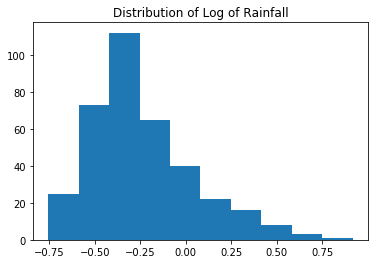

In [21]:
# taking a look at the feature we are using to predict
plt.hist(df.log_rainfall)
plt.title('Distribution of Log of Rainfall')

In [22]:
# First - establish a baseline. 
# Sales is normally distributed, so the average
baseline = df.sales.mean()

# crating empty df to hold actual, predicted, residuals
log_rain_residuals = pd.DataFrame()

# adding x and y
log_rain_residuals['x'] = df.log_rainfall
log_rain_residuals['y'] = df.sales

# adding baseline prediction of mode .77
log_rain_residuals['baseline'] = baseline

# calculating baseline residuals
log_rain_residuals['baseline_residual'] = log_rain_residuals.baseline - log_rain_residuals.y

# creating model for rainfall predicting sales
model = ols('sales ~ log_rainfall', df).fit()

# creates prediction (sales) based on x (rainfall)
log_rain_residuals['y_hat'] = model.predict()

# calculates residual of model
log_rain_residuals['model_residual'] = log_rain_residuals.y_hat - log_rain_residuals.y


log_rain_residuals.head(5)

,x,y,baseline,baseline_residual,y_hat,model_residual
0,0.693147,10,25.323288,15.323288,3.688573,-6.311427
1,0.285179,13,25.323288,12.323288,13.198359,0.198359
2,0.285179,15,25.323288,10.323288,13.198359,-1.801641
3,0.048790,17,25.323288,8.323288,18.708608,1.708608
4,0.000000,18,25.323288,7.323288,19.845912,1.845912


In [23]:
baseline_sse, model_sse = sum_squared_errors(log_rain_residuals)

print('\nBaseline')
print('SSE - The baselines sum of squared errors is:', round(baseline_sse, 3))
print('MSE - The mean of squared errors is:', round(baseline_sse/len(df.sales), 3))
print('RMSE - The square root of the mean of squared errors is:', round(sqrt(baseline_sse/len(df.sales)), 3))

print('\nModel')
print('SSE - The models sum of squared errors is:', round(model_sse, 3))
print('MSE - The mean of squared errors is:', round(model_sse/len(df.sales), 3))
print('RMSE - The square root of the mean of squared errors is:', round(sqrt(model_sse/len(df.sales)), 3))

# calculate r squared first
r2 = model.rsquared
print('\nR-squared = ', round(r2,3))

# if p is low, we reject the null (aka reject that the feature is not significant)
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)
print("The model is significant!")

Our model beats the baseline! We can continue to evaluate.

Baseline
SSE - The baselines sum of squared errors is: 17297.852
MSE - The mean of squared errors is: 47.391
RMSE - The square root of the mean of squared errors is: 6.884

Model
SSE - The models sum of squared errors is: 952.325
MSE - The mean of squared errors is: 2.609
RMSE - The square root of the mean of squared errors is: 1.615

R-squared =  0.945
p-value for model significance =  1.224262409779449e-230
The model is significant!


In [24]:
# creating a DF to hold these values for each model
models['Model_3'] = [round(model_sse, 3), round(model_sse/len(df.sales), 3), round(sqrt(model_sse/len(df.sales)), 3)]
models.head()

,Model_1,Model_2,Model_3,Model_4
SSE,6083.326,2998.237,952.325,NaN
MSE,16.667,8.214,2.609,NaN
RMSE,4.082,2.866,1.615,NaN


- In the next section of your notebook, perform the steps above with the temperature column as the model's only feature. Does this model beat the baseline? Would you prefer the rainfall, log_rainfall, or the flyers model?

(array([ 2., 18., 27., 48., 65., 88., 57., 38., 14.,  8.]),
 array([ 15.1 ,  23.88,  32.66,  41.44,  50.22,  59.  ,  67.78,  76.56,
         85.34,  94.12, 102.9 ]),
 <a list of 10 Patch objects>)

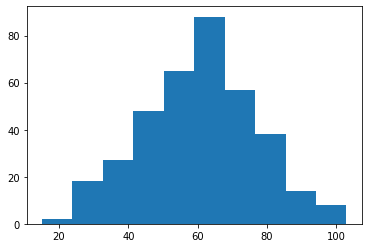

In [25]:
plt.hist(df.temperature)

In [26]:
# First - establish a baseline. 
# Distribution is normal - choosing average
baseline = df.sales.mean()

# creating empty df to hold actual, predicted, residuals
temp_residuals = pd.DataFrame()

# adding x and y
temp_residuals['x'] = df.temperature
temp_residuals['y'] = df.sales

# adding baseline prediction of average
temp_residuals['baseline'] = baseline

# calculating baseline residuals
temp_residuals['baseline_residual'] = temp_residuals.baseline - temp_residuals.y

# creating model for rainfall predicting sales
model = ols('sales ~ temperature', df).fit()

# creates prediction (sales) based on x (rainfall)
temp_residuals['y_hat'] = model.predict()

# calculates residual of model
temp_residuals['model_residual'] = temp_residuals.y_hat - temp_residuals.y


temp_residuals.head(5)

,x,y,baseline,baseline_residual,y_hat,model_residual
0,27.0,10,25.323288,15.323288,11.112301,1.112301
1,28.9,13,25.323288,12.323288,11.912772,-1.087228
2,34.5,15,25.323288,10.323288,14.272055,-0.727945
3,44.1,17,25.323288,8.323288,18.316540,1.316540
4,42.4,18,25.323288,7.323288,17.600329,-0.399671


In [27]:
baseline_sse, model_sse = sum_squared_errors(temp_residuals)

print('\nBaseline')
print('SSE - The baselines sum of squared errors is:', round(baseline_sse, 3))
print('MSE - The mean of squared errors is:', round(baseline_sse/len(df.sales), 3))
print('RMSE - The square root of the mean of squared errors is:', round(sqrt(baseline_sse/len(df.sales)), 3))

print('\nModel')
print('SSE - The models sum of squared errors is:', round(model_sse, 3))
print('MSE - The mean of squared errors is:', round(model_sse/len(df.sales), 3))
print('RMSE - The square root of the mean of squared errors is:', round(sqrt(model_sse/len(df.sales)), 3))

# calculate r squared first
r2 = model.rsquared
print('\nR-squared = ', round(r2,3))

# if p is low, we reject the null (aka reject that the feature is not significant)
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)
print("The model is significant!")

Our model beats the baseline! We can continue to evaluate.

Baseline
SSE - The baselines sum of squared errors is: 17297.852
MSE - The mean of squared errors is: 47.391
RMSE - The square root of the mean of squared errors is: 6.884

Model
SSE - The models sum of squared errors is: 349.978
MSE - The mean of squared errors is: 0.959
RMSE - The square root of the mean of squared errors is: 0.979

R-squared =  0.98
p-value for model significance =  1.492364042585725e-309
The model is significant!


In [28]:
# creating a DF to hold these values for each model
models['Model_4'] = [round(model_sse, 3), round(model_sse/len(df.sales), 3), round(sqrt(model_sse/len(df.sales)), 3)]
models.head()

,Model_1,Model_2,Model_3,Model_4
SSE,6083.326,2998.237,952.325,349.978
MSE,16.667,8.214,2.609,0.959
RMSE,4.082,2.866,1.615,0.979


- Which of these 4 single regression models would you want to move forward with?

In [29]:
models

,Model_1,Model_2,Model_3,Model_4
SSE,6083.326,2998.237,952.325,349.978
MSE,16.667,8.214,2.609,0.959
RMSE,4.082,2.866,1.615,0.979


- Model 4 has the best metrics, I choose you temperature model!

# Tips dataset
- Load the tips dataset from pydataset or seaborn

In [30]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1. Define your baseline for "tip".  Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill. 

average: 2.9982786885245902 
mode: 0    2.0
dtype: float64 
median: 2.9


(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

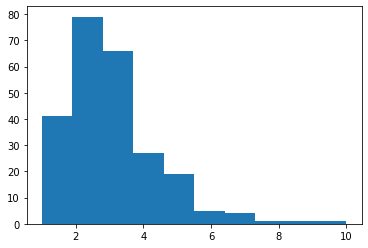

In [31]:
print('average:',tips.tip.mean(),'\nmode:',tips.tip.mode(),'\nmedian:',tips.tip.median())
plt.hist(tips.tip)

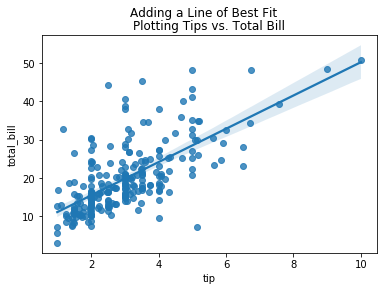

In [32]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Tips vs. Total Bill")
sns.regplot(x="tip", y="total_bill", data=tips)
plt.show()

In [33]:
baseline = tips.tip.median()

residuals = pd.DataFrame()
residuals['x'] = tips.total_bill
residuals['y'] = tips.tip
residuals['baseline'] = baseline
residuals['baseline_residual'] = residuals.baseline - residuals.y
residuals.head(5)

,x,y,baseline,baseline_residual
0,16.99,1.01,2.9,1.89
1,10.34,1.66,2.9,1.24
2,21.01,3.50,2.9,-0.60
3,23.68,3.31,2.9,-0.41
4,24.59,3.61,2.9,-0.71


2. Fit a linear regression model (ordinary least squares) and compute what, predictions of tip using total_bill. Here is some sample code to get you started:
        - from statsmodels.formula.api import ols
        - from pydataset import data

        - df = data("tips")

        - model = ols('tip ~ total_bill', data=df).fit()
        - predictions = model.predict(df.x)

In [34]:
model = ols('tip ~ total_bill', data=tips).fit()

residuals['y_hat'] = model.predict()

residuals['model_residual'] = residuals.y_hat - residuals.y

residuals.head()

,x,y,baseline,baseline_residual,y_hat,model_residual
0,16.99,1.01,2.9,1.89,2.704636,1.694636
1,10.34,1.66,2.9,1.24,2.006223,0.346223
2,21.01,3.50,2.9,-0.60,3.126835,-0.373165
3,23.68,3.31,2.9,-0.41,3.407250,0.097250
4,24.59,3.61,2.9,-0.71,3.502822,-0.107178


1. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [35]:
# function created in cell 10
# returns sse for baseline and model
baseline_sse, model_sse = sum_squared_errors(residuals)

print('\nSSE - The models sum of squared errors is:', round(model_sse, 3))
print('MSE - The mean of squared errors is:', round(model_sse/len(df.sales), 3))
print('RMSE - The square root of the mean of squared errors is:', round(sqrt(model_sse/len(df.sales)), 3))

Our model beats the baseline! We can continue to evaluate.

SSE - The models sum of squared errors is: 252.789
MSE - The mean of squared errors is: 0.693
RMSE - The square root of the mean of squared errors is: 0.832


2. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [36]:
print('SSE - The baselines sum of squared errors is:', round(baseline_sse, 3))
print('MSE - The mean of squared errors is:', round(baseline_sse/len(df.sales), 3))
print('RMSE - The square root of the mean of squared errors is:', round(sqrt(baseline_sse/len(df.sales)), 3))

SSE - The baselines sum of squared errors is: 467.569
MSE - The mean of squared errors is: 1.281
RMSE - The square root of the mean of squared errors is: 1.132


3. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [37]:
# function created in cell 10
baseline_sse, model_sse = sum_squared_errors(residuals)

Our model beats the baseline! We can continue to evaluate.


4. What is the amount of variance explained in your model?

5. Is your model significantly better than the baseline model?

In [40]:
# calculate r squared first
r2 = model.rsquared
print('\nR-squared = ', round(r2,3))

# if p is low, we reject the null (aka reject that the feature is not significant)
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)
print("The model is significant!")


R-squared =  0.457
p-value for model significance =  6.692470646863376e-34
The model is significant!


6. Plot the residuals for the linear regression model that you made.

In [38]:
def plot_residuals(actual, baseline, predicted):
    
    residuals = actual - predicted
    base_residuals = baseline - predicted
    
    plt.figure(figsize=(20,9))

    font = {'size': 22}
    plt.rc('font', **font)
    
    plt.subplot(121)
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylim(-5,5)
    plt.ylabel('residual ($model_y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Model Residual')
    
    plt.subplot(122)
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, base_residuals)
    plt.ylim(-5,5)
    plt.ylabel('residual ($baseline_y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Baseline Residual')
    
    return plt.gca()

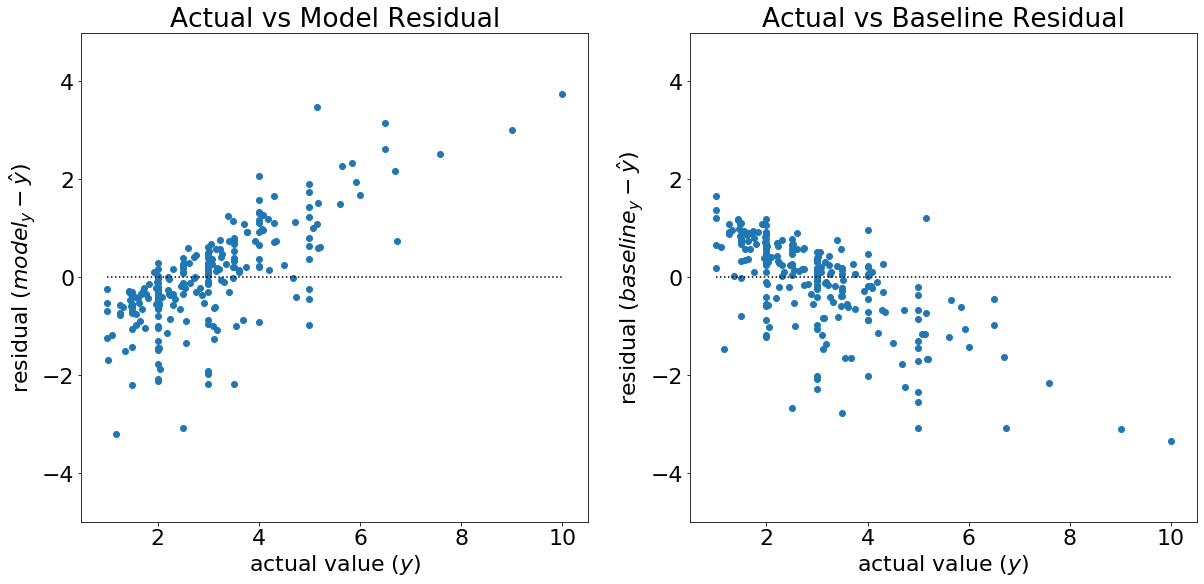

In [39]:
# Model
plot_residuals(residuals.y, residuals.baseline, residuals.y_hat)